___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Logistic Regression Project Exercise - Solutions

**GOAL: Creating a Classification Model that can predict whether or not a person has presence of heart disease based on physical features of that person (age,sex, cholesterol, etc...)**



## Imports

**TASK: Run the cell below to import the necessary libraries.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

This database contains 14 physical attributes based on physical testing of a patient. Blood samples are taken and the patient also conducts a brief exercise test. The "goal" field refers to the presence of heart disease in the patient. It is integer (0 for no presence, 1 for presence). In general, to confirm 100% if a patient has heart disease can be quite an invasive process, so if we can create a model that accurately predicts the likelihood of heart disease, we can help avoid expensive and invasive procedures.

Content

Attribute Information:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

----

**TASK: Run the cell below to read in the data.**

In [2]:
df = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [3]:
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df['target'].unique()

array([0, 1])

### Exploratory Data Analysis and Visualization



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


### Visualization Tasks

**Creating a bar plot that shows the total counts per target value.**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

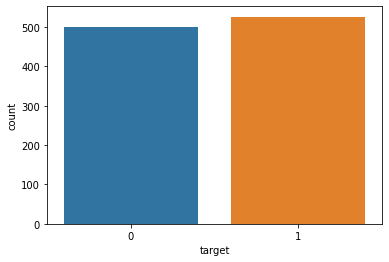

In [7]:
sns.countplot(df['target'])

**Creating a pairplot that displays the relationships between the following columns:**

    ['age','trestbps', 'chol','thalach','target']
   
*Note: Running a pairplot on everything can take a very long time due to the number of features*

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

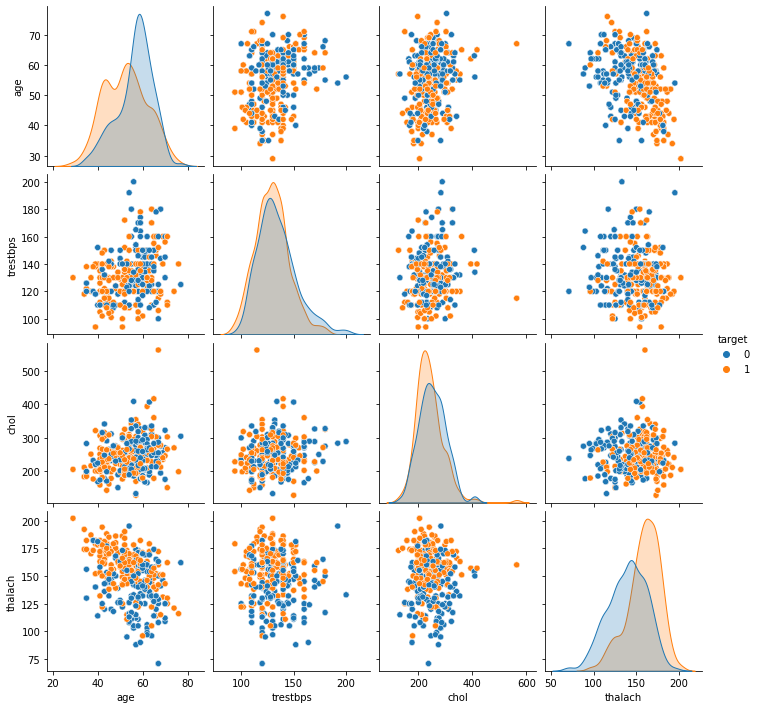

In [9]:
# Running pairplot on everything will take a very long time to render!
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

**Creating a heatmap that displays the correlation between all the columns.**

<AxesSubplot:>

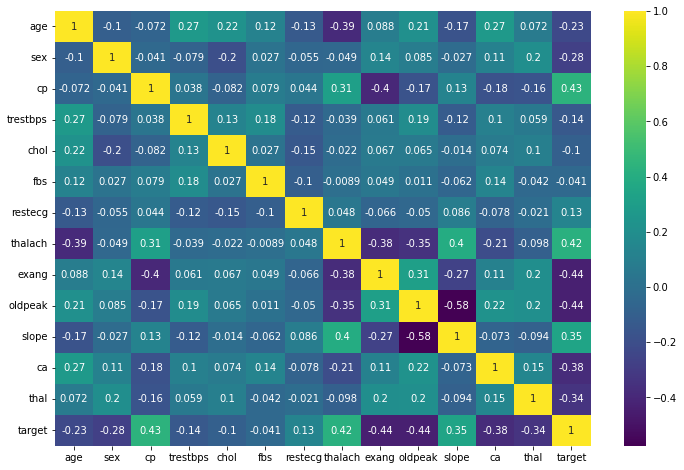

In [10]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

----
----

# Machine Learning

## Train | Test Split and Scaling


In [11]:
X = df.drop('target',axis=1)
y = df['target']

**Perform a train test split on the data, with the test size of 10% and a random_state of 101.**

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**Creating a StandardScaler object and normalize the X train and test set feature data. Make sure you only fit to the training data to avoid data leakage (data knowledge leaking from the test set).**

In [14]:
scaler = StandardScaler()

In [15]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

**Creating a Logistic Regression model and use Cross-Validation to find a well-performing C value for the hyper-parameter search.**

In [16]:
from sklearn.linear_model import LogisticRegressionCV 

In [17]:
log_model = LogisticRegressionCV()

In [18]:
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

**Report back your search's optimal parameters, specifically the C value.** 



In [19]:
log_model.C_

array([0.00599484])

In [20]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeffecients

**Report back the model's coefficients.**

In [21]:
log_model.coef_

array([[-0.1093356 , -0.29001856,  0.36265298, -0.10367586, -0.06603391,
        -0.01985913,  0.09946636,  0.25597633, -0.28538996, -0.29238371,
         0.20479911, -0.32049603, -0.25727105]])

**Creating a visualization of the coefficients by using a barplot of their values.**

In [22]:
coefs = pd.Series(index=X.columns,data=log_model.coef_[0])

In [23]:
coefs = coefs.sort_values()

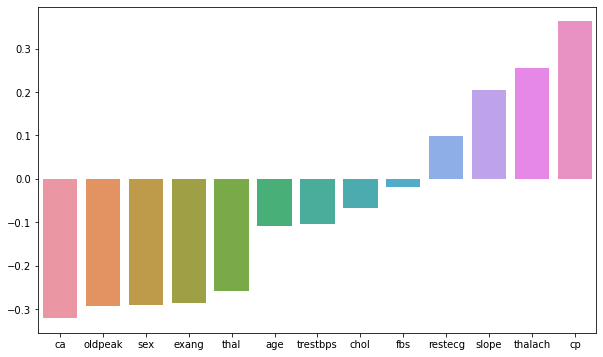

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x=coefs.index,y=coefs.values);

---------

## Model Performance Evaluation

**Let's now evaluate your model on the remaining 10% of the data, the test set.**

**We will Create the following evaluations:**
* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [25]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [26]:
y_pred = log_model.predict(scaled_X_test)

In [27]:
confusion_matrix(y_test,y_pred)

array([[41,  9],
       [ 5, 48]])

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


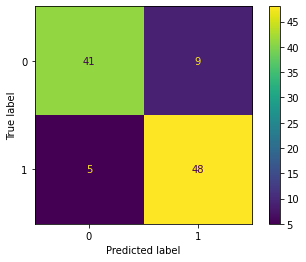

In [28]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85        50
           1       0.84      0.91      0.87        53

    accuracy                           0.86       103
   macro avg       0.87      0.86      0.86       103
weighted avg       0.87      0.86      0.86       103



### Performance Curves

**Creating both the precision recall curve and the ROC Curve.**

In [30]:
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


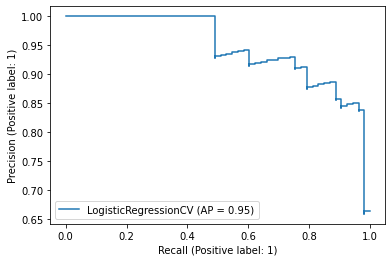

In [31]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


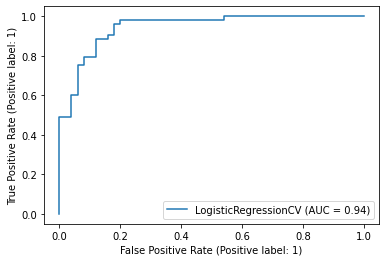

In [32]:
plot_roc_curve(log_model,scaled_X_test,y_test)

**Final Task: A patient with the following features has come into the medical office:**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

**What does our model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

**For convience, we created an array of the features for the patient above**

In [33]:
patient = [[ 54. ,   1. ,   0. , 122. , 286. ,   0. ,   0. , 116. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [34]:
X_test.iloc[-1]

age          42.0
sex           1.0
cp            2.0
trestbps    130.0
chol        180.0
fbs           0.0
restecg       1.0
thalach     150.0
exang         0.0
oldpeak       0.0
slope         2.0
ca            0.0
thal          2.0
Name: 934, dtype: float64

In [35]:
y_test.iloc[-1]

1

In [36]:
log_model.predict(patient)

array([0])

In [37]:
log_model.predict_proba(patient)

array([[9.99962215e-01, 3.77854601e-05]])

----

## Great Job!